## Practico 5

- <u>Matriz de Confusion</u>: La metrica que utilizaremos tiene que ver con precision y sensivity. Notar que cuando se tiene una muestra desbalanceada el acuracy es cercano a uno (90 positivos y 10 negativos - ponele que me da 90 positivos y 10 falsos positivos). Luego por eso se utiliza el f1 score (creo que es la metrica de la que hablaba el profe).

- <u>En el notebook</u>: Analisis exploratorio de datos. Explorar como son las distribucion de la variables con respecto a las variables objetivos (starget), predictorias son las (fitcher). Hacer correlacion de fitcher. Explorar auglaiers (sirve para descartar datos que no son optimos, definicion con cuartiles). 
Condiciones: Graficos con analisis exploratorio de datos. Luego una parte bien clara con limpieza de datos (por ejemplo outlaiers), especificar eso en la Limpieza de datos. Entrenamiento de modelo y Generacion de predicciones. Es decir debe tener 4 secciones.

- Hacer un grafico de boxplots (sacar informacion de la pagina Seaborn).

-df.isna()sum() para ver valores nulos 
-df_train.describe()

In [11]:
import pandas as pd 
import seaborn as sns

In [12]:
df = pd.read_csv('/home/carolina/Escritorio/Astrometria/practicos/Astrometria-2025/practico5_astrometria/galaxy_forming_burst_test.csv')
df.head()

,ID,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err
0,1237656906355048679,359.882500,-1.011695,19.34624,18.21367,17.75281,17.43699,17.23576,18.259090,51.824020,...,20.46436,19.85486,19.57471,0.349946,0.336899,0.342106,0.336519,0.316463,0.076849,0.000012
1,1237648721225711796,168.508873,-0.007002,20.08095,18.58526,17.82388,17.35917,17.01471,9.279436,36.803690,...,19.69541,18.53301,18.33405,0.300323,0.292062,0.304036,0.311175,0.337448,0.072482,0.000009
2,1237655473438851815,260.209844,26.321156,22.92703,20.01030,18.46797,17.73924,17.28094,0.645773,9.904737,...,22.06661,19.84510,19.27482,0.137121,0.679532,0.661082,0.665039,0.767354,0.323387,0.000057
3,1237651274034184295,125.648654,52.388509,19.28477,17.77666,16.92267,16.47363,16.18417,19.322850,77.505940,...,19.22704,17.94705,17.69468,0.597250,0.874807,0.918937,0.889690,0.838195,0.091731,0.000010
4,1237661125612142849,125.846050,25.560856,18.64250,17.84922,17.69156,17.56612,17.48753,34.913430,72.495770,...,18.96511,18.79242,18.83481,0.421484,0.418764,0.461124,0.467602,0.421164,0.027804,0.000006


In [15]:
df_train = pd.read_csv('/home/carolina/Escritorio/Astrometria/practicos/Astrometria-2025/practico5_astrometria/galaxy_forming_burst_train.csv')
df_train.head()


,ID,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err,target
0,1237663542066479839,316.862138,-0.895678,19.01775,17.64755,17.06249,16.70350,16.49018,24.71067,87.29298,...,19.10930,18.70515,0.671345,0.651463,0.666413,0.690870,0.621546,0.096112,0.000009,1
1,1237655124482064438,206.623360,3.878296,17.04417,15.99764,15.55414,15.37217,15.18734,152.17130,398.97420,...,18.04992,17.76888,0.367797,0.279793,0.260749,0.232302,0.240708,0.017826,0.000006,0
2,1237655501889667673,258.396808,29.744604,19.07817,17.60122,16.84234,16.36071,16.06588,23.37314,91.09844,...,18.18285,17.70473,0.292335,0.307789,0.323592,0.328726,0.323058,0.080695,0.000008,1
3,1237648722837700815,171.667200,1.135270,18.92527,17.69376,16.97346,16.52742,16.25693,26.90786,83.65588,...,17.73501,17.39894,0.648844,0.734394,0.779769,0.773851,0.777902,0.137939,0.000008,0
4,1237655469672890715,229.001991,2.406898,18.13839,16.88722,16.26597,15.89510,15.62886,55.54449,175.83760,...,18.22657,17.90952,0.443804,0.372774,0.364403,0.368019,0.372280,0.038428,0.000008,1


<Axes: xlabel='target', ylabel='ra'>

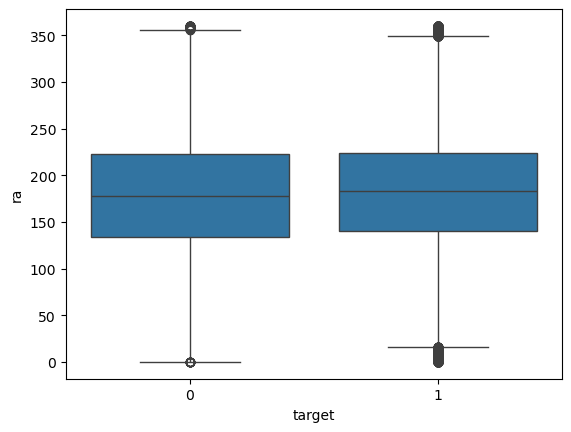

In [16]:
sns.boxplot(df_train, x='target', y='ra')

Notar que dentro de la caja tenemos el 50% de los datos. Los bordes son los outlaiers. Los datos dentro de los outlaiers son los que usamos, fuera descartados.


In [17]:
df_train.describe()

,ID,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err,target
count,5.999800e+04,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,...,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000
mean,1.237659e+18,180.384569,23.449607,18.126597,16.865635,16.563169,16.037549,15.658734,30.055777,96.794240,...,17.691225,17.240204,-1.003568,-0.920878,-0.575042,-0.742777,-0.940974,0.117153,0.000014,0.749942
std,6.100020e+12,75.881812,21.172938,122.705999,122.690772,108.200242,115.664710,122.676784,69.571287,200.295311,...,115.678567,122.690936,122.462459,122.463432,108.004569,115.460737,122.463198,0.100733,0.000013,0.433050
min,1.237646e+18,0.009724,-11.244273,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-41.197150,-4.341232,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-0.000619,0.000002,0.000000
25%,1.237655e+18,138.640727,2.999227,18.765855,17.510082,16.903970,16.533660,16.289337,9.194943,34.240767,...,18.299955,17.996275,0.299999,0.399881,0.419802,0.419094,0.381224,0.055743,0.000008,0.000000
50%,1.237659e+18,181.463258,20.898735,19.351790,18.074330,17.462595,17.095825,16.863815,18.163075,58.910855,...,18.851620,18.568260,0.509175,0.589641,0.605789,0.605105,0.575589,0.085866,0.000011,1.000000
75%,1.237663e+18,223.754866,42.304939,20.090335,18.662650,17.939502,17.604725,17.465097,31.148128,99.017768,...,19.595282,19.303463,0.699986,0.770352,0.775132,0.774710,0.752549,0.135511,0.000015,1.000000
max,1.237681e+18,359.993947,68.694746,30.806540,29.323290,30.430370,30.562360,27.945680,7192.298000,9013.129000,...,25.966680,23.478590,1.000000,1.000000,0.999999,0.999999,0.999998,0.572899,0.000199,1.000000


In [1]:
from sklearn.model_selection import train_test_split

Hacer el EDA de los datos (ANALISIS EXPLORATORIO DE DATOS)